# Easier navigation:

------------------------------------
## 0. <a href='#col'>Columns</a>
## 1. <a href='#setup'>Setup</a>
------------------------------------
## 2. <a href='#pca'>PCA</a>
## 3. <a href='#a'>Fixed Entry Feature Investigation</a>
## 4. <a href='#b'>Variable Entry Feature Investigation</a>
## 5. <a href='#c'>Other</a>

<a name='col'></a>
# 0. Columns

0. Timestamp
1. How many units are you currently taking?
2. How old are you?
3. What's your major? ("n/a" if not applicable, otherwise capitalize first letter, ex. "Biology")
4. On a scale from 1 to 10 how productive do you think you were today?  
5. How many assignments/tasks have you accomplished today? (Give in the form of a fraction or percentage)
6. What is your average daily screen time?  (hours)
7. What are the top apps used
8. What social media platforms do you use the most? 
9. How much in total daily? weekly?
10. Are you listening to anything right now? 
11. What music genre do you prefer to listen to?
12. In general are you an athletic/fit person? 
13. How many hours did you spend exercising today?
14. How many times did you exercise this week?
15. Do you try to stay fit? 
16. Why do you exercise? 
17. How much do you drink on average each time? (# of drinks)
18. When was the last time you consumed an alcoholic beverage?
19. Why do you drink?
20. How much sleep did you get last night? 
21. How much sleep do you get on average? 
22. How much sleep do you wish to get on average?
23. Do you take naps regularly? 
24. What is the date?
25. What is the time right now? 
26. On a scale of 1 to 10, how stressed do you feel right now?
27. On a scale of 1 to 10, how stressed have you been on average in the past 6 months?
28. Are you a vegetarian/vegan? 
29. Do you have any dietary restrictions?
30. Number Memory
31. Sequence Memory
32. Visual Memory
33. Memory Sum

<a name='setup'></a>
# 1. Setting up table

Given that we only have ~50 entries, it'd probably be easier to manually edit bad entries than to have to correct it using regex, etc.

A lot of free response columns don't seem very useful, but if you want to investigate it you can edit the data to fit a certain form.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()
plt.style.use('fivethirtyeight')
import zipfile
import os # Used to interact with the file system
import re
from copy import deepcopy
#from tabulate import tabulate
import plotly.express as px

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model as lm
from sklearn.feature_extraction import DictVectorizer
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
# Note: If you're having problems with the 3d scatter plots, uncomment the two␣
#,→lines below, and you should see a version that
# number that is at least 4.1.1.
# import plotly
# plotly.__version__


In [ ]:
# from google.colab import auth
# auth.authenticate_user()

# from googleapiclient.discovery import build
# service = build('drive', 'v3')

In [ ]:
# # Run this to mount the Notebook in your Google Drive account 
# from google.colab import drive
# #drive.mount('/content/drive')
# drive.mount('/content/drive', force_remount=True)

Specify path for CSV file.

In [ ]:
path = "Cogsci100 Survey2.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,Timestamp,How many units are you currently taking?,How old are you?,"What's your major? (""n/a"" if not applicable, otherwise capitalize first letter, ex. ""Biology"")",On a scale from 1 to 10 how productive do you think you were today?,How many assignments/tasks have you accomplished today? (Give in the form of a fraction or percentage),What is your average daily screen time? (hours),What are the top apps used,What social media platforms do you use the most?,How much in total daily? weekly?,...,Do you take naps regularly?,What is the date?,What is the time right now?,"On a scale of 1 to 10, how stressed do you feel right now?","On a scale of 1 to 10, how stressed have you been on average in the past 6 months?",Are you a vegetarian/vegan?,Do you have any dietary restrictions?,Number Memory,Sequence Memory,Visual Memory
0,2021/03/17 6:41:47 PM MDT,19,18,Chemistry,8,2/5,6-8,Tiktok and Snapchat,Youtube;Instagram;TikTok;Snapchat,30,...,No,2021-03-17,20:41,3,6,No,Nope,10,10,10
1,2021/03/17 6:46:26 PM MDT,16,19,Business,3,1/10,4-6,Tiktok Instagram Netflix,Instagram,35 minutes daily 5 hour weekly,...,No,2021-03-17,20:41,8,2,No,Nope,9,8,9
2,2021/03/17 6:52:18 PM MDT,15,19,Health Science,8,3/5,4-6,"TikTok, Instagram",Youtube;Instagram;TikTok;Snapchat,6hr 21min daily. 25hr 27mins weekly,...,No,2021-03-17,20:47,9,10,No,milk in the morning makes me doodoo,8,6,11
3,2021/03/17 6:58:38 PM MDT,17,19,Computer Science,7,1,6-8,"YouTube, Messenger, Chrome",Youtube;Messenger,"3, 20",...,Yes,2021-03-17,20:56,7,8,No,No,11,9,9
4,2021/03/17 7:04:52 PM MDT,16,20,Business Admin & Econ,5,1/2,4-6,"Instagram, Tiktok",Facebook;Youtube;Instagram;TikTok;Snapchat;Dis...,"6 daily, 48 weekly",...,No,2021-03-17,14:56,8,6,No,Nope,10,16,11


### 1.1 Print columns

Uncomment print line to print all columns/numbers to replace with section 0.

In [ ]:
from pprint import pprint
ctt = 0
for i in df.columns:
  #print(str(ctt) + ". " + i)
  ctt += 1

In [ ]:
dict={}
for i in np.arange(33):
  dict[i] = df.columns[i]
df = df.rename(columns={x:y for x,y in zip(df.columns,range(0,len(df.columns)))})
df[33] = df[30] + df[31] + df[32]
dict[33] = "Memory Sum"
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2021/03/17 6:41:47 PM MDT,19,18,Chemistry,8,2/5,6-8,Tiktok and Snapchat,Youtube;Instagram;TikTok;Snapchat,30,...,2021-03-17,20:41,3,6,No,Nope,10,10,10,30
1,2021/03/17 6:46:26 PM MDT,16,19,Business,3,1/10,4-6,Tiktok Instagram Netflix,Instagram,35 minutes daily 5 hour weekly,...,2021-03-17,20:41,8,2,No,Nope,9,8,9,26
2,2021/03/17 6:52:18 PM MDT,15,19,Health Science,8,3/5,4-6,"TikTok, Instagram",Youtube;Instagram;TikTok;Snapchat,6hr 21min daily. 25hr 27mins weekly,...,2021-03-17,20:47,9,10,No,milk in the morning makes me doodoo,8,6,11,25
3,2021/03/17 6:58:38 PM MDT,17,19,Computer Science,7,1,6-8,"YouTube, Messenger, Chrome",Youtube;Messenger,"3, 20",...,2021-03-17,20:56,7,8,No,No,11,9,9,29
4,2021/03/17 7:04:52 PM MDT,16,20,Business Admin & Econ,5,1/2,4-6,"Instagram, Tiktok",Facebook;Youtube;Instagram;TikTok;Snapchat;Dis...,"6 daily, 48 weekly",...,2021-03-17,14:56,8,6,No,Nope,10,16,11,37


In [ ]:
dict

{0: 'Timestamp',
 1: 'How many units are you currently taking?',
 2: 'How old are you?',
 3: 'What\'s your major? ("n/a" if not applicable, otherwise capitalize first letter, ex. "Biology")',
 4: 'On a scale from 1 to 10 how productive do you think you were today?  ',
 5: 'How many assignments/tasks have you accomplished today? (Give in the form of a fraction or percentage)',
 6: 'What is your average daily screen time?  (hours)',
 7: 'What are the top apps used',
 8: 'What social media platforms do you use the most? ',
 9: 'How much in total daily? weekly?',
 10: 'Are you listening to anything right now? ',
 11: 'What music genre do you prefer to listen to?',
 12: 'In general are you an athletic/fit person? ',
 13: 'How many hours did you spend exercising today?',
 14: 'How many times did you exercise this week?',
 15: 'Do you try to stay fit? ',
 16: 'Why do you exercise? ',
 17: 'How much do you drink on average each time? (# of drinks)',
 18: 'When was the last time you consumed an

# 2. PCA

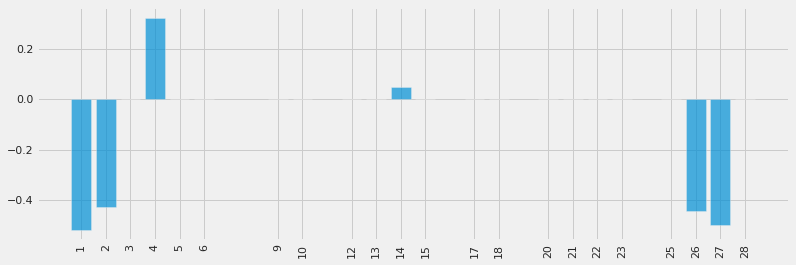

('How many times did you exercise this week?',
 0     3
 1     5
 2     2
 3     4
 4     5
 5     2
 6     3
 7     6
 8     0
 9     4
 10    3
 11    1
 12    1
 13    2
 14    0
 15    0
 16    1
 17    2
 18    6
 19    2
 20    0
 21    2
 22    6
 23    0
 24    1
 25    3
 26    2
 27    1
 28    4
 29    2
 30    2
 31    1
 32    2
 33    3
 34    5
 35    2
 36    2
 37    0
 38    4
 39    1
 40    0
 41    2
 42    1
 43    3
 44    0
 Name: 14, dtype: int64)

In [ ]:
def pca(df):
  # Center data
  df_mean = df.mean(axis=0)
  df_centered = df - df_mean
  # Scale - each col has unit variance
  df_centered_scaled = df_centered / np.sqrt(np.var(df_centered))
  # for the case where all values are 0, SVD doesn't converge
  df_centered_scaled = df_centered_scaled.fillna(0)
  # Break into components
  #df_centered_scaled.dropna(inplace=True)
  u, s, vt = np.linalg.svd(df_centered_scaled, full_matrices=False)
  v = vt.T
  P = df_centered @ v
  plt.figure(figsize=(12, 4))
  plt.bar(df.columns, vt[0, :], alpha=0.7)
  plt.xticks(df.columns, rotation=90)
  plt.show()
  
  return P

pca(df[[1,2,3,4,5,6,9,10,12,13,14,15,17,18,20,21,22,23,25,26,27,28]])
dict[14], df[14]

<a name='a'></a>
# 3. Fixed Entry Feature Investigation

Picking columns with multiple choice / yes-no answers to compare with memory results

ENTER QUESTION NUMBER HERE

In [ ]:
k = 10

#-------------
dict[k]


'Are you listening to anything right now? '

<AxesSubplot:xlabel='10', ylabel='Count'>

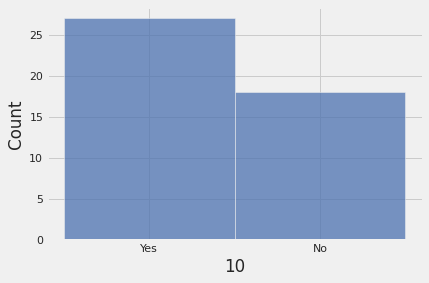

In [ ]:
sns.histplot(df[k])

ENTER CUTOFF HERE

In [ ]:
cutoff1 = 1

-------------------------------------

In [ ]:
#df[[k, 30, 31, 32, 33]]

In [ ]:
df[[k, 30, 31, 32, 33]].groupby([k]).mean()

,30,31,32,33
10,,,,
No,10.000000,10.777778,11.222222,32.000000
Yes,9.481481,9.962963,11.407407,30.851852


In [ ]:
df[[k, 30]].groupby([k]).count()

,30
10,
No,18
Yes,27


-------------------------------------------------------------

## Numerical X-axis only

Average scores with less than CUTOFF

In [ ]:
# np.average(df[df[k] <= cutoff1][30]), np.average(df[df[k] <= cutoff1][31]), np.average(df[df[k] <= cutoff1][32]), np.average(df[df[k] <= cutoff1][33])

Average scores with more than CUTOFF

In [ ]:
# np.average(df[df[k] > cutoff1][30]), np.average(df[df[k] > cutoff1][31]), np.average(df[df[k] > cutoff1][32]), np.average(df[df[k] > cutoff1][33])

Graphs

In [ ]:
# low = False

In [ ]:
# sns.regplot(x=df[k], y=df[30], color="r"
#       , lowess=low
#       )

# np.corrcoef(df[k], df[30])[0, 1]


In [ ]:
# sns.regplot(x=df[k], y=df[31], color="y"
#       , lowess=low
#       )

# np.corrcoef(df[k], df[31])[0, 1]

In [ ]:
# sns.regplot(x=df[k], y=df[32], color="g"
#       , lowess=low
#       )

# np.corrcoef(df[k], df[32])[0, 1]

In [ ]:
# sns.regplot(x=df[k], y=df[33], color="b"
#       , lowess=low
#       )

# np.corrcoef(df[k], df[33])[0, 1]

<a name='b'></a>
# 4.  Variable Entry Feature Investigation

Picking columns with free response entries to compare with memory results

<a name='c'></a>
# 5. Other

Anything that does not involve memory tests as a comparison

# 6. Heatmap - Comparing Independent Variables

In [ ]:
reduced = df[[6, 17, 20, 30, 31, 32, 33]]
reduced = reduced.rename(columns = {6:"Average Daily Screentime (hrs)", 17:"Average Alcohol Intake (# of drinks)", 20:"Sleep Last Night (hrs)", 
                                   30: "Number Memory", 31: "Sequence Memory", 32: "Visual Memory", 33: "Overall Memory"})
reduced.head()

,Average Daily Screentime (hrs),Average Alcohol Intake (# of drinks),Sleep Last Night (hrs),Number Memory,Sequence Memory,Visual Memory,Overall Memory
0,6-8,5-6,5 - 7 hrs,10,10,10,30
1,4-6,7+,5 - 7 hrs,9,8,9,26
2,4-6,1-2,8 - 10 hrs,8,6,11,25
3,6-8,1-2,5 - 7 hrs,11,9,9,29
4,4-6,7+,5 - 7 hrs,10,16,11,37


### Variable Pairs: 
1. Screentime and Alcohol 
2. Screentime and Sleep 
3. Alcohol and Sleep  

In [ ]:
screen_alc = pd.pivot_table(reduced, values = "Overall Memory", index = "Average Daily Screentime (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
screen_alc = screen_alc.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_alc = screen_alc[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
screen_alc.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Average Daily Screentime (hrs),,,,,,
10+,32.000000,30.000000,23.0,28.500000,NaN,NaN
8-10,NaN,50.000000,47.0,25.333333,NaN,NaN
6-8,31.333333,NaN,29.6,33.333333,30.0,24.0
4-6,40.000000,29.333333,28.0,37.000000,27.5,31.5
2-4,33.666667,NaN,NaN,36.000000,NaN,39.0


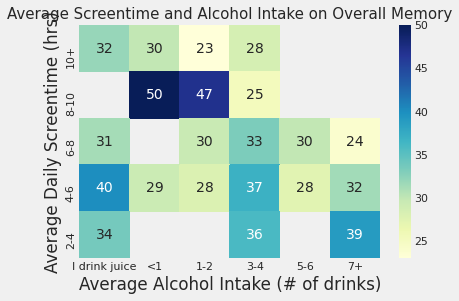

In [ ]:
sns.heatmap(screen_alc, annot = True, cmap = "YlGnBu")
plt.title("Average Screentime and Alcohol Intake on Overall Memory", fontsize = 15)
sns.set(font_scale = 1.0)

In [ ]:
screen_sleep = pd.pivot_table(reduced, values = "Overall Memory", index = "Average Daily Screentime (hrs)", columns = "Sleep Last Night (hrs)", aggfunc = np.average)
screen_sleep = screen_sleep.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_sleep = screen_sleep[["5 - 7 hrs", "8 - 10 hrs", "10+ hrs"]]
screen_sleep

Sleep Last Night (hrs),5 - 7 hrs,8 - 10 hrs,10+ hrs
Average Daily Screentime (hrs),,,
10+,29.500,28.666667,NaN
8-10,29.000,43.000000,NaN
6-8,28.125,34.200000,NaN
4-6,31.500,26.250000,40.0
2-4,37.500,31.000000,NaN


Text(0.5, 1.0, 'Average Screentime and Sleep on Overall Memory')

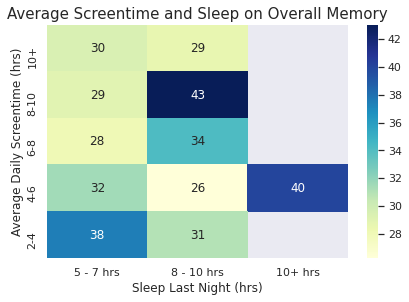

In [ ]:
sns.heatmap(screen_sleep, annot = True, cmap = "YlGnBu")
plt.title("Average Screentime and Sleep on Overall Memory", fontsize = 15)

In [ ]:
sleep_alc = pd.pivot_table(reduced, values = "Overall Memory", index = "Sleep Last Night (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
sleep_alc = sleep_alc.reindex(index = ["10+ hrs", "8 - 10 hrs", "5 - 7 hrs"])
sleep_alc = sleep_alc[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
sleep_alc

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Sleep Last Night (hrs),,,,,,
10+ hrs,40.00,NaN,NaN,NaN,NaN,NaN
8 - 10 hrs,30.75,30.0,29.75,39.666667,NaN,NaN
5 - 7 hrs,34.00,33.6,30.00,28.000000,28.333333,29.0


Text(0.5, 1.0, 'Average Sleep and Alcohol Intake on Overall Memory')

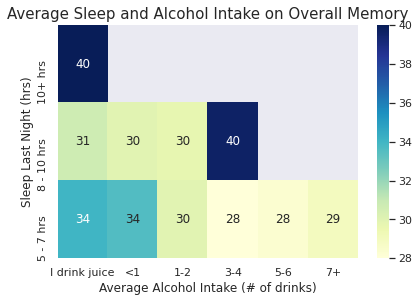

In [ ]:
sns.heatmap(sleep_alc, annot = True, cmap = "YlGnBu")
plt.title("Average Sleep and Alcohol Intake on Overall Memory", fontsize = 15)

In [ ]:
screen_alc_num = pd.pivot_table(reduced, values = "Number Memory", index = "Average Daily Screentime (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
screen_alc_num = screen_alc_num.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_alc_num = screen_alc_num[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
screen_alc_num.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Average Daily Screentime (hrs),,,,,,
10+,10.500000,9.500000,8.0,8.500000,NaN,NaN
8-10,NaN,13.000000,11.0,7.666667,NaN,NaN
6-8,9.666667,NaN,9.6,10.666667,10.0,8.0
4-6,9.000000,8.666667,9.4,12.000000,9.0,9.5
2-4,10.666667,NaN,NaN,12.000000,NaN,10.0


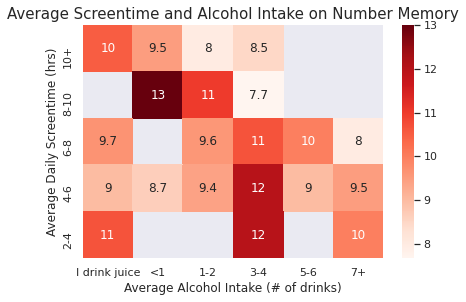

In [ ]:
sns.heatmap(screen_alc_num, annot = True, cmap = "Reds")
plt.title("Average Screentime and Alcohol Intake on Number Memory", fontsize = 15)
sns.set(font_scale = 1.0)

In [ ]:
screen_sleep_num = pd.pivot_table(reduced, values = "Number Memory", index = "Average Daily Screentime (hrs)", columns = "Sleep Last Night (hrs)", aggfunc = np.average)
screen_sleep_num = screen_sleep_num.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_sleep_num = screen_sleep_num[["5 - 7 hrs", "8 - 10 hrs", "10+ hrs"]]
screen_sleep_num.head()

Sleep Last Night (hrs),5 - 7 hrs,8 - 10 hrs,10+ hrs
Average Daily Screentime (hrs),,,
10+,9.500,9.00,NaN
8-10,8.000,11.50,NaN
6-8,9.625,10.00,NaN
4-6,9.900,8.75,9.0
2-4,11.000,11.00,NaN


Text(0.5, 1.0, 'Average Screentime and Sleep on Number Memory')

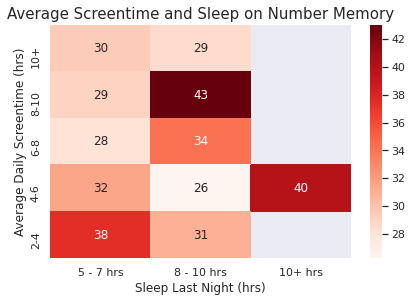

In [ ]:
sns.heatmap(screen_sleep, annot = True, cmap = "Reds")
plt.title("Average Screentime and Sleep on Number Memory", fontsize = 15)

In [ ]:
sleep_alc_num = pd.pivot_table(reduced, values = "Number Memory", index = "Sleep Last Night (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
sleep_alc_num = sleep_alc_num.reindex(index = ["10+ hrs", "8 - 10 hrs", "5 - 7 hrs"])
sleep_alc_num = sleep_alc_num[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
sleep_alc_num.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Sleep Last Night (hrs),,,,,,
10+ hrs,9.00,NaN,NaN,NaN,NaN,NaN
8 - 10 hrs,9.75,9.0,9.0,12.333333,NaN,NaN
5 - 7 hrs,10.75,9.8,10.5,8.875000,9.333333,9.0


Text(0.5, 1.0, 'Average Sleep and Alcohol Intake on Number Memory')

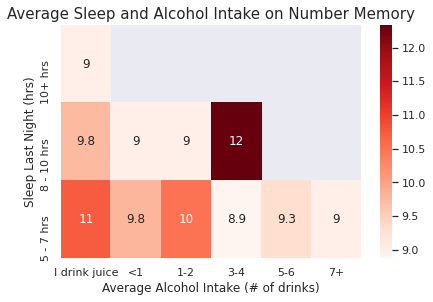

In [ ]:
sns.heatmap(sleep_alc_num, annot = True, cmap = "Reds")
plt.title("Average Sleep and Alcohol Intake on Number Memory", fontsize = 15)

In [ ]:
screen_alc_seq = pd.pivot_table(reduced, values = "Sequence Memory", index = "Average Daily Screentime (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
screen_alc_seq = screen_alc_seq.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_alc_seq = screen_alc_seq[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
screen_alc_seq.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Average Daily Screentime (hrs),,,,,,
10+,10.0,8.000000,6.0,9.000000,NaN,NaN
8-10,NaN,22.000000,25.0,7.666667,NaN,NaN
6-8,11.0,NaN,8.8,11.333333,10.0,8.0
4-6,17.0,10.333333,7.6,12.000000,9.0,12.0
2-4,9.0,NaN,NaN,11.000000,NaN,14.0


Text(0.5, 1.0, 'Average Screentime and Alcohol Intake on Sequence Memory')

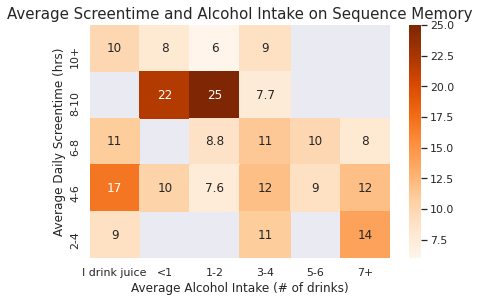

In [ ]:
sns.heatmap(screen_alc_seq, annot = True, cmap = "Oranges")
plt.title("Average Screentime and Alcohol Intake on Sequence Memory", fontsize = 15)

In [ ]:
screen_sleep_seq = pd.pivot_table(reduced, values = "Sequence Memory", index = "Average Daily Screentime (hrs)", columns = "Sleep Last Night (hrs)", aggfunc = np.average)
screen_sleep_seq = screen_sleep_seq.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_sleep_seq = screen_sleep_seq[["5 - 7 hrs", "8 - 10 hrs", "10+ hrs"]]
screen_sleep_seq.head()

Sleep Last Night (hrs),5 - 7 hrs,8 - 10 hrs,10+ hrs
Average Daily Screentime (hrs),,,
10+,9.000000,8.0,NaN
8-10,10.333333,19.5,NaN
6-8,9.125000,11.2,NaN
4-6,10.700000,7.0,17.0
2-4,10.500000,8.5,NaN


Text(0.5, 1.0, 'Average Screentime and Sleep on Sequence Memory')

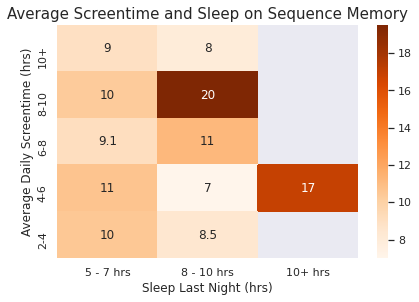

In [ ]:
sns.heatmap(screen_sleep_seq, annot = True, cmap = "Oranges")
plt.title("Average Screentime and Sleep on Sequence Memory", fontsize = 15)

In [ ]:
sleep_alc_seq = pd.pivot_table(reduced, values = "Sequence Memory", index = "Sleep Last Night (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
sleep_alc_seq = sleep_alc_seq.reindex(index = ["10+ hrs", "8 - 10 hrs", "5 - 7 hrs"])
sleep_alc_seq = sleep_alc_seq[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
sleep_alc_seq.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Sleep Last Night (hrs),,,,,,
10+ hrs,17.00,NaN,NaN,NaN,NaN,NaN
8 - 10 hrs,10.25,6.0,9.625,13.333333,NaN,NaN
5 - 7 hrs,9.75,12.6,9.000,8.750000,9.333333,10.666667


Text(0.5, 1.0, 'Average Screentime and Alcohol Intake on Sequence Memory')

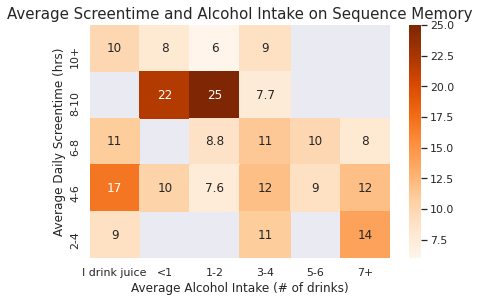

In [ ]:
sns.heatmap(screen_alc_seq, annot = True, cmap = "Oranges")
plt.title("Average Screentime and Alcohol Intake on Sequence Memory", fontsize = 15)

In [ ]:
screen_alc_vis = pd.pivot_table(reduced, values = "Visual Memory", index = "Average Daily Screentime (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
screen_alc_vis = screen_alc_vis.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_alc_vis = screen_alc_vis[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
screen_alc_vis.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Average Daily Screentime (hrs),,,,,,
10+,11.500000,12.500000,9.0,11.000000,NaN,NaN
8-10,NaN,15.000000,11.0,10.000000,NaN,NaN
6-8,10.666667,NaN,11.2,11.333333,10.0,8.0
4-6,14.000000,10.333333,11.0,13.000000,9.5,10.0
2-4,14.000000,NaN,NaN,13.000000,NaN,15.0


Text(0.5, 1.0, 'Average Screentime and Alcohol Intake on Visual Memory')

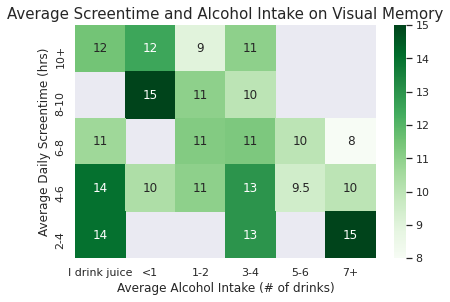

In [ ]:
sns.heatmap(screen_alc_vis, annot = True, cmap = "Greens")
plt.title("Average Screentime and Alcohol Intake on Visual Memory", fontsize = 15)

In [ ]:
screen_sleep_vis = pd.pivot_table(reduced, values = "Visual Memory", index = "Average Daily Screentime (hrs)", columns = "Sleep Last Night (hrs)", aggfunc = np.average)
screen_sleep_vis = screen_sleep_vis.reindex(index = ["10+", "8-10", "6-8", "4-6","2-4"])
screen_sleep_vis = screen_sleep_vis[["5 - 7 hrs", "8 - 10 hrs", "10+ hrs"]]
screen_sleep_vis.head()

Sleep Last Night (hrs),5 - 7 hrs,8 - 10 hrs,10+ hrs
Average Daily Screentime (hrs),,,
10+,11.000000,11.666667,NaN
8-10,10.666667,12.000000,NaN
6-8,9.375000,13.000000,NaN
4-6,10.900000,10.500000,14.0
2-4,16.000000,11.500000,NaN


Text(0.5, 1.0, 'Average Screentime and Sleep on Visual Memory')

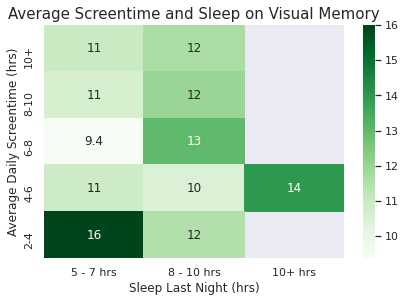

In [ ]:
sns.heatmap(screen_sleep_vis, annot = True, cmap = "Greens")
plt.title("Average Screentime and Sleep on Visual Memory", fontsize = 15)

In [ ]:
sleep_alc_vis = pd.pivot_table(reduced, values = "Visual Memory", index = "Sleep Last Night (hrs)", columns = "Average Alcohol Intake (# of drinks)", aggfunc = np.average)
sleep_alc_vis = sleep_alc_vis.reindex(index = ["10+ hrs", "8 - 10 hrs", "5 - 7 hrs"])
sleep_alc_vis = sleep_alc_vis[["I drink juice", "<1", "1-2", "3-4", "5-6", "7+"]]
sleep_alc_vis.head()

Average Alcohol Intake (# of drinks),I drink juice,<1,1-2,3-4,5-6,7+
Sleep Last Night (hrs),,,,,,
10+ hrs,14.00,NaN,NaN,NaN,NaN,NaN
8 - 10 hrs,10.75,15.0,11.125,14.000,NaN,NaN
5 - 7 hrs,13.50,11.2,10.500,10.375,9.666667,9.333333


Text(0.5, 1.0, 'Average Screentime and Sleep on Visual Memory')

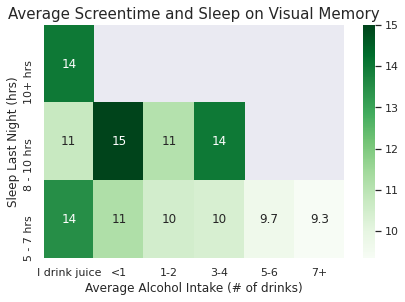

In [ ]:
sns.heatmap(sleep_alc_vis, annot = True, cmap = "Greens")
plt.title("Average Screentime and Sleep on Visual Memory", fontsize = 15)